# Import libraries

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load data


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# Define features

In [3]:
features = ['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality', 
            'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore', 
            'TrackDurationMs', 'Energy']
X = train[features]
y = train['BeatsPerMinute']
X_test = test[features]

# Feature engineering: Log-transform skewed features

In [4]:
X['AudioLoudness'] = np.log1p(-X['AudioLoudness'])
X_test['AudioLoudness'] = np.log1p(-X_test['AudioLoudness'])
X['TrackDurationMs'] = np.log1p(X['TrackDurationMs'])
X_test['TrackDurationMs'] = np.log1p(X_test['TrackDurationMs'])

C:\Users\mohan\AppData\Local\Temp\ipykernel_20108\3028610528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AudioLoudness'] = np.log1p(-X['AudioLoudness'])
C:\Users\mohan\AppData\Local\Temp\ipykernel_20108\3028610528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['AudioLoudness'] = np.log1p(-X_test['AudioLoudness'])
C:\Users\mohan\AppData\Local\Temp\ipykernel_20108\3028610528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

# Standardize features

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Split data


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train XGBoost


In [7]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


# Validate

In [8]:
xgb_pred = xgb_model.predict(X_val)
xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_pred))
print(f"XGBoost RMSE: {xgb_rmse:.4f}")

XGBoost RMSE: 26.4586


# Generate test predictions

In [9]:
test_pred = xgb_model.predict(X_test_scaled)
submission['BeatsPerMinute'] = test_pred
submission.to_csv('submission_xgb.csv', index=False)
print("Submission file created: submission_xgb.csv")

Submission file created: submission_xgb.csv


# Feature importance plot


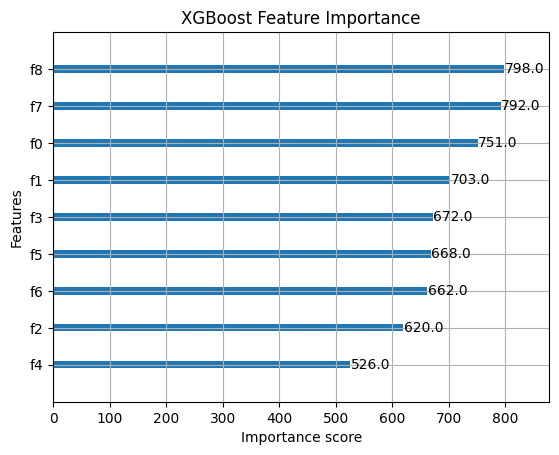

In [10]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.title('XGBoost Feature Importance')
plt.show()